In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2024-10-05 12:25:05.906416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 12:25:05.923305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 12:25:05.928055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 12:25:05.947105: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 12:25:06.751714: W tensorflow/compiler/tf2

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set for GPUs")
    except RuntimeError as e:
        print(e)
print(gpus)

Memory growth set for GPUs
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1728105907.729733   30321 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728105907.767448   30321 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728105907.767508   30321 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
# param
TARGET_SIZE = (128,128)
COLOR_MODE = 'grayscale'
if COLOR_MODE == 'rgb':
    INPUT_SHAPE = TARGET_SIZE + (3,) # 1 for grayscale, 3 for RGB
elif COLOR_MODE == 'grayscale':
    INPUT_SHAPE = TARGET_SIZE + (1,) # 1 for grayscale, 3 for RGB

BATCH_SIZE = 4

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                
    validation_split=0.2,          
    rotation_range=40,
    width_shift_range=0.2,         
    height_shift_range=0.2,        
    shear_range=0.2,                        
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,                
    validation_split=0.2          
)

train = train_datagen.flow_from_directory(
    'dataset/edge_detection',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode=COLOR_MODE,
    subset='training'
)

val = val_datagen.flow_from_directory(
    'dataset/edge_detection',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode=COLOR_MODE,
    subset='validation'
)   

Found 224 images belonging to 7 classes.


Found 56 images belonging to 7 classes.


In [5]:
l2_value = 0.0001
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=INPUT_SHAPE, kernel_regularizer=l2(l2_value)),
    MaxPooling2D(2, 2),
    Conv2D(64, (2, 2), activation='relu', kernel_regularizer=l2(l2_value)),
    Conv2D(128, (2, 2), activation='relu', kernel_regularizer=l2(l2_value)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(128, activation='relu', kernel_regularizer=l2(l2_value)),
    Dropout(0.25),
    # Dense(64, activation='relu',kernel_regularizer=l2(l2_value)),
    # Dropout(0.25),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1728105907.860616   30321 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728105907.860760   30321 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728105907.860807   30321 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728105907.982865   30321 cuda_executor.cc:1001] 

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train,
    epochs=50, 
    validation_data=val,
    batch_size=BATCH_SIZE
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728105910.342092   30461 service.cc:146] XLA service 0x7f3f08003bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728105910.342147   30461 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-10-05 12:25:10.377060: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-05 12:25:10.545091: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 5/56 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2250 - loss: 3.7480

2024-10-05 12:25:13.385964: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 68 bytes spill stores, 68 bytes spill loads

I0000 00:00:1728105913.399019   30461 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.1546 - loss: 2.5873 - val_accuracy: 0.1071 - val_loss: 2.0441
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1107 - loss: 2.0389 - val_accuracy: 0.1250 - val_loss: 2.0238
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1384 - loss: 2.0205 - val_accuracy: 0.0714 - val_loss: 2.0102
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.1358 - loss: 2.0079 - val_accuracy: 0.1429 - val_loss: 1.9998
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.1431 - loss: 1.9981 - val_accuracy: 0.1250 - val_loss: 1.9920
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.1070 - loss: 1.9909 - val_accuracy: 0.1250 - val_loss: 1.9859
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1805 - loss: 1.9842 - val_accuracy: 0.1429 - val_loss: 1.9810
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.1452 - loss: 1.9796 - val_accuracy: 0.1429 - val_loss: 1.

In [8]:
# fungsi buat evaluate model
def modelEvaluation(history, m):    
    plt.figure(figsize=(14, 4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1553 - loss: 1.9518
Validation Loss: 1.952314019203186
Validation Accuracy: 0.1428571492433548


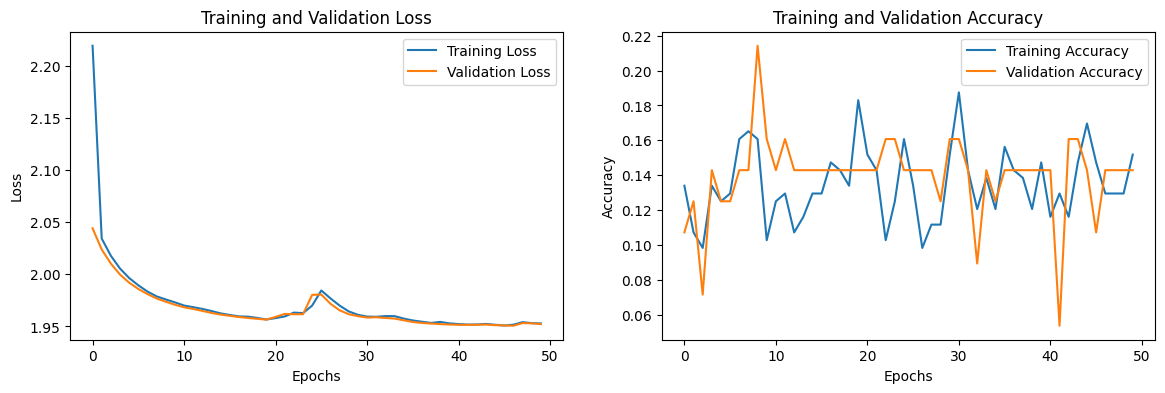

In [9]:
val_loss, val_accuracy = model.evaluate(val)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

modelEvaluation(history, model)